<a href="https://colab.research.google.com/github/vigneshwarjayabal/NLP/blob/main/NLP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Natural Language Processing**

- Setup Spacy and Language Library
-Understant Basic NLP Topic

  - Tokenization
  - Stemming
  - Lemmatization
  - Stop Words
- Spacy for Vocabulary Matching

What is Spacy?

- Open Source NLP Library.
- Designed to effectively handle NLP tasks with the most efficient implementation of comman algorithms.
- **spaCy** (https://spacy.io/) is an open-source Python library that parses and "understands" large volumes of text. Separate models are available that cater to specific languages (English, French, German, etc.).
- For many NLP tasks,Spacy only has one implement method, choosing the most efficient algorithm currently avaible.

What is NLTK?

- NLTK - Natural Language Toolkit is a very popular open source.

- Initially released in 2001 , it is much older than Spacy(released 2015)

- It also provides many functionalities , but includes less efficient implementations.

NLTK vs Spacy

- For many comman NLP tasks, Spacy is much faster and more efficient , at the cost of the user not being able to choose algorithmic implementations.

- Spacy dones not iclude pre-created models for some application , such as sentiment analysis, which is typically easier to perform with NLTK.



What is NLP?
- natural Language Processing(NLP) is an area of computer science and artificail intellgence concerned with the interactions between computers and human(natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.

- Natural Language Processing (NLP) is a subfield of Artificial Intelligence (AI) that focuses on the interaction between computers and human languages.

Goal of NLP:

The goal of NLP is to enable computers to understand, interpret, and generate human language in a way that is meaningful and useful. It bridges the gap between human communication (natural language) and machine understanding.

Key Components of NLP

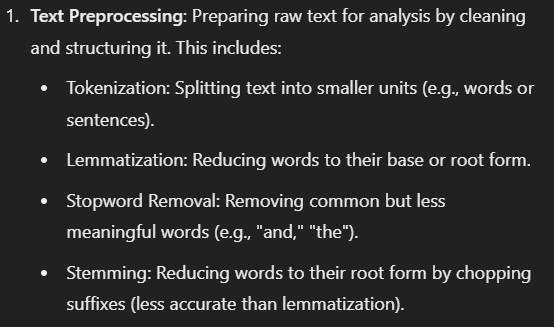

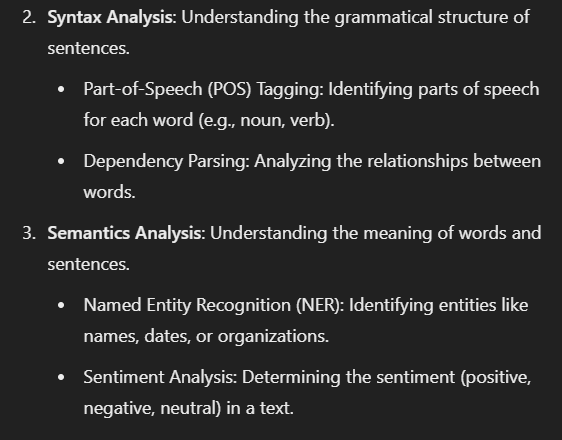

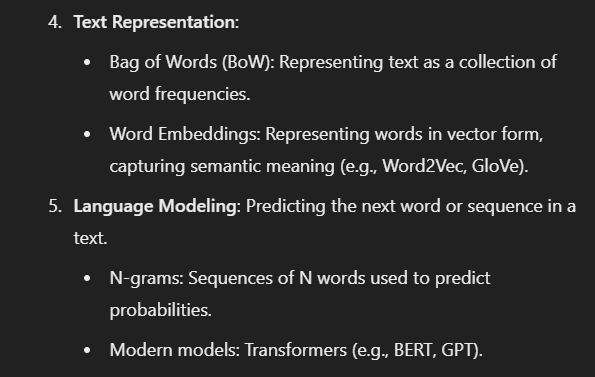

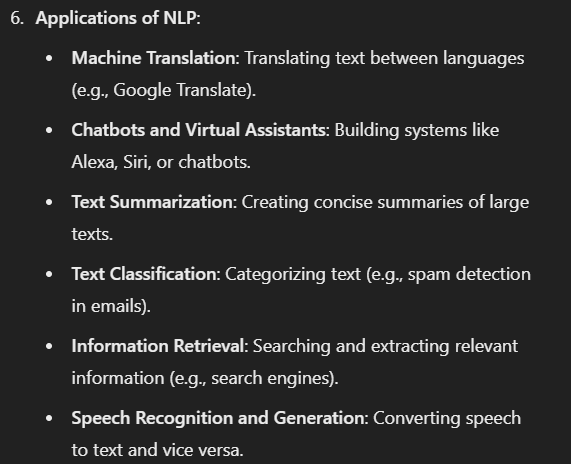

# **Spacy Setup and Overview**

Example Use Case:

- Classifying Emails as Spam vs Legitimate.
- Sentiment Analysis of Text Movie Reviews.
- Analyzing Trends from Written Customer Feedback forms.

- Understanding text commands,"Hey Google, Play this song".

# Installation and Setup

Installation is a two-step process. First, install spaCy using either conda or pip. Next, download the specific model you want, based on language.<br> For more info visit https://spacy.io/usage/

### 1. From the command line or terminal:
> `conda install -c conda-forge spacy`
> <br>*or*<br>
> `pip install -U spacy`

> ### Alternatively you can create a virtual environment:
> `conda create -n spacyenv python=3 spacy=2`

### 2. Next, also from the command line (you must run this as admin or use sudo):

> `python -m spacy download en`

> ### If successful, you should see a message like:

> **`Linking successful`**<br>
> `    C:\Anaconda3\envs\spacyenv\lib\site-packages\en_core_web_sm -->`<br>
> `    C:\Anaconda3\envs\spacyenv\lib\site-packages\spacy\data\en`<br>
> ` `<br>
> `    You can now load the model via spacy.load('en')`


In [ ]:
!pip install spacy


In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 54.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


There are few Key steps for working with Spacy:

- Loading the Lanquage Library
- Building a pipeline Object
- Using Tokens
- Parts-of-Speech Tagging
- Understanding Token Attributes.

The npl() function from spacy automatically takes raw text and performs a series of operation to tag,parse, and describe the text data.

In [2]:
import spacy
# Load the English language model
nlp = spacy.load("en_core_web_sm")

In [ ]:
doc = nlp('Tesla is looking at buying U.S. startup for $6 million')

**Tokenization** - Segmenting text into words, punctuations marks etc.

**Part-of-speech (POS)** -  Tagging	Assigning word types to tokens, like verb or noun.

**Dependency Parsing** -	Assigning syntactic dependency labels, describing the relations between individual tokens, like subject or object.

In [ ]:
for token in doc:
  print(token.text)

Tesla
is
looking
at
buying
U.S.
startup
for
$
6
million


In [ ]:
for token in doc:
  print(token.text, token.pos)

Tesla 96
is 87
looking 100
at 85
buying 100
U.S. 96
startup 92
for 85
$ 99
6 93
million 93


In [ ]:
for token in doc:
  print(token.text, token.pos_)

Tesla PROPN
is AUX
looking VERB
at ADP
buying VERB
U.S. PROPN
startup NOUN
for ADP
$ SYM
6 NUM
million NUM


In [ ]:
for token in doc:
  print(token.text, token.pos_ ,token.dep_)

Tesla PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.S. PROPN compound
startup NOUN dobj
for ADP prep
$ SYM quantmod
6 NUM compound
million NUM pobj


# Pipeline
When we run `nlp`, our text enters a *processing pipeline* that first breaks down the text and then performs a series of operations to tag, parse and describe the data.

When you call nlp on a text, spaCy first tokenizes the text to produce a Doc object. The Doc is then processed in several different steps – this is also referred to as the processing pipeline. The pipeline used by the trained pipelines typically include a tagger, a lemmatizer, a parser and an entity recognizer. Each pipeline component returns the processed Doc, which is then passed on to the next component.



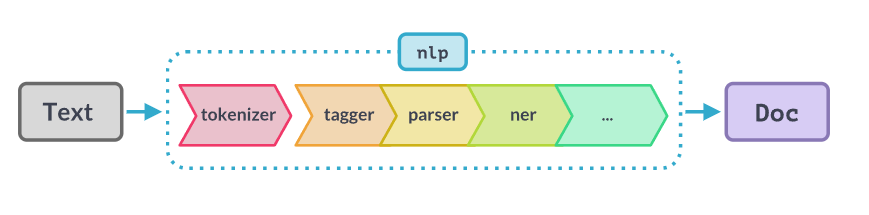

In [ ]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7eecadc663f0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7eecadc65cd0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7eed6abc3df0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7eecadc75d90>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7eecada2e8d0>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7eed707f8580>)]

In [ ]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

## Tokenization
The first step in processing text is to split up all the component parts (words & punctuation) into "tokens". These tokens are annotated inside the Doc object to contain descriptive information.

In [ ]:
doc2 = nlp(u"Tesla isn't looking into startups anymore.")

In [ ]:
for token in doc2:
  print(token.text, token.pos_ ,token.dep_)

Tesla PROPN nsubj
is AUX aux
n't PART neg
looking VERB ROOT
into ADP prep
startups NOUN pobj
anymore ADV advmod
. PUNCT punct


In [ ]:
doc3 = nlp(u"Tesla isn't    looking into startups anymore.")

In [ ]:
for token in doc3:
  print(token.text, token.pos_ ,token.dep_)

Tesla PROPN nsubj
is AUX aux
n't PART neg
    SPACE dep
looking VERB ROOT
into ADP prep
startups NOUN pobj
anymore ADV advmod
. PUNCT punct


In [ ]:
# we can also use indexing to actually grab tokens individually

doc3[0]

Tesla

In [ ]:
type(doc3[0])

spacy.tokens.token.Token

## Part-of-Speech Tagging (POS)
The next step after splitting the text up into tokens is to assign parts of speech. In the above example, `Tesla` was recognized to be a ***proper noun***. Here some statistical modeling is required. For example, words that follow "the" are typically nouns.


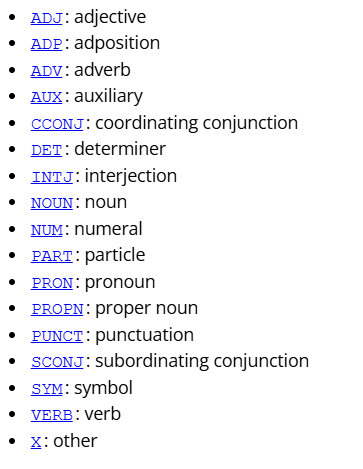

In [ ]:
doc3[0].pos_

'PROPN'

In [ ]:
type(doc3[0].pos_)

str

# dependency

In Natural Language Processing (NLP), dependency refers to the grammatical structure of a sentence, where words are connected based on their syntactic relationships. This structure is represented in the form of a dependency tree, where each word in a sentence is a node, and the edges represent the grammatical dependencies between words.

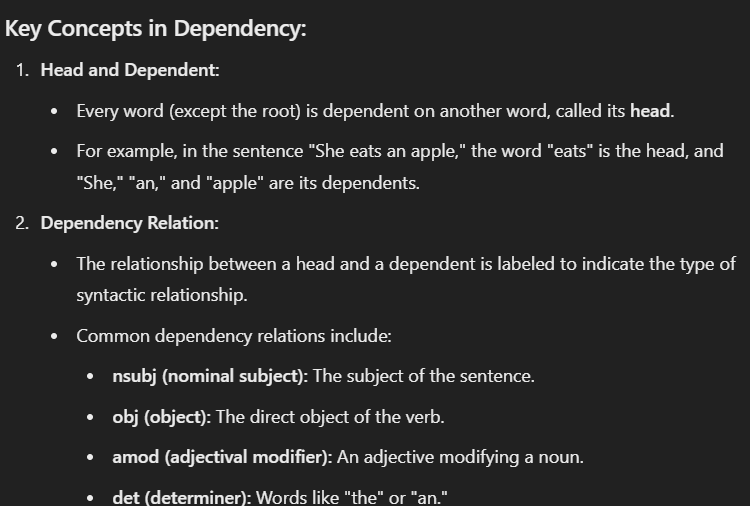

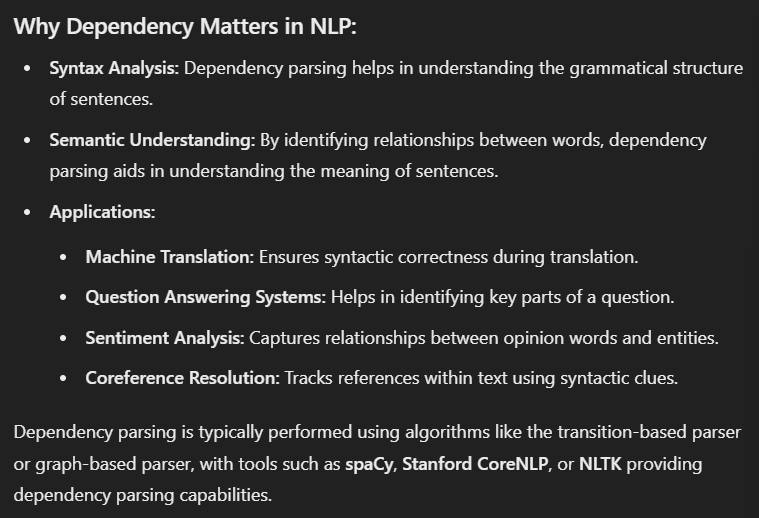

In [ ]:
doc3[0].dep_

'nsubj'

In [ ]:
spacy.explain('PROPN')

'proper noun'

In [ ]:
spacy.explain('nsubj')

'nominal subject'

In [ ]:
#To see the full name of a tag use `spacy.explain(tag)`

#Additional Token Attributes
We'll see these again in upcoming lectures. For now we just want to illustrate some of the other information that spaCy assigns to tokens:

|Tag|Description|doc2[0].tag|
|:------|:------:|:------|
|`.text`|The original word text<!-- .element: style="text-align:left;" -->|`Tesla`|
|`.lemma_`|The base form of the word|`tesla`|
|`.pos_`|The simple part-of-speech tag|`PROPN`/`proper noun`|
|`.tag_`|The detailed part-of-speech tag|`NNP`/`noun, proper singular`|
|`.shape_`|The word shape – capitalization, punctuation, digits|`Xxxxx`|
|`.is_alpha`|Is the token an alpha character?|`True`|
|`.is_stop`|Is the token part of a stop list, i.e. the most common words of the language?|`False`|

In [ ]:
# Lemmas (the base form of the word):
print(doc3[4].text)
print(doc3[4].lemma_)

looking
look


In [ ]:
# Simple Parts-of-Speech & Detailed Tags:
print(doc2[4].pos_)
print(doc2[4].tag_ + ' / ' + spacy.explain(doc2[4].tag_))

ADP
IN / conjunction, subordinating or preposition


In [ ]:
# Word Shapes:
print(doc2[0].text+': '+doc2[0].shape_)
print(doc[5].text+' : '+doc[5].shape_)

Tesla: Xxxxx
U.S. : X.X.


In [ ]:
# Boolean Values:
print(doc2[0].is_alpha)
print(doc2[0].is_stop)

True
False


**Spans**
Large Doc objects can be hard to work with at times. A **span** is a slice of Doc object in the form `Doc[start:stop]`.

In [3]:
doc3 = nlp(u'Although commmonly attributed to John Lennon from his song "Beautiful Boy", \
the phrase "Life is what happens to us while we are making other plans" was written by \
cartoonist Allen Saunders and published in Reader\'s Digest in 1957, when Lennon was 17.')

In [4]:
life_quote = doc3[16:30]

In [5]:
print(life_quote)

"Life is what happens to us while we are making other plans"


In [6]:
type(life_quote)

spacy.tokens.span.Span

In [7]:
type(doc3)

spacy.tokens.doc.Doc

**Sentence**

In [10]:
doc4 = nlp("This is the first sentence.This is another sentence.This is third sentence.")

In [11]:
for sent in doc4.sents:
  print(sent)

This is the first sentence.
This is another sentence.
This is third sentence.


In [12]:
doc4[6].is_sent_start

True

In [13]:
doc4[5].is_sent_end

True

# Tokenization

- Tokenization is the process of breaking up the original text into component pieces(Tokens).

- Tokens are pieces of the original text.

- Tokens are the basic building blocks of a Doc object - everything that helps us understand the menaing of the text is derived from tokens and their relationship to one another.

- prefix: Characters at the beginning
- suffix: characters at the end
- infix: characters in between prefix and suffix.
- exception: Special-case rule to split a string into several tokens or prevent a token from being split when punctuation rules are applied.






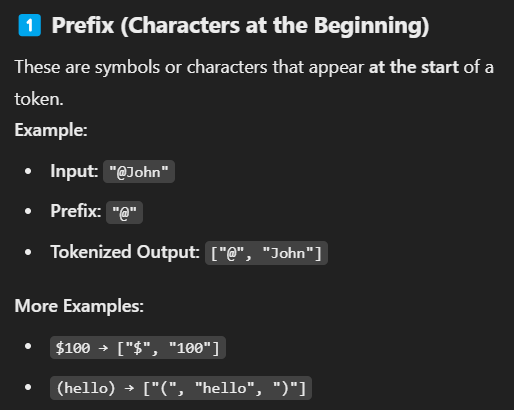


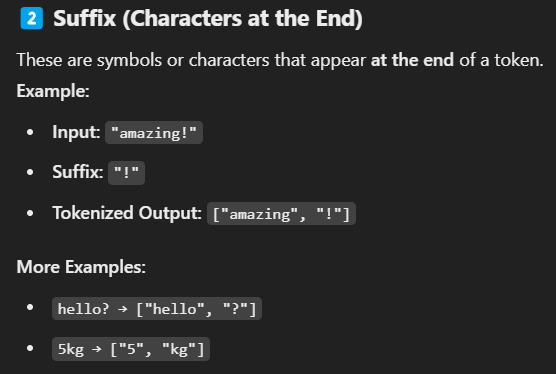

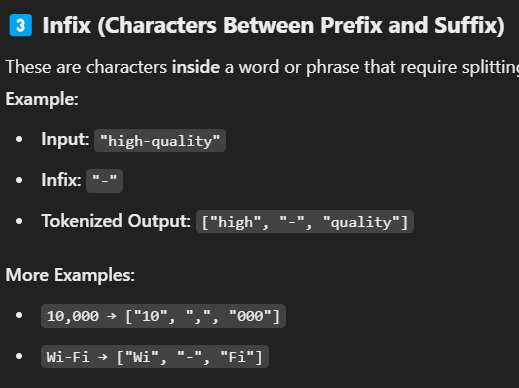

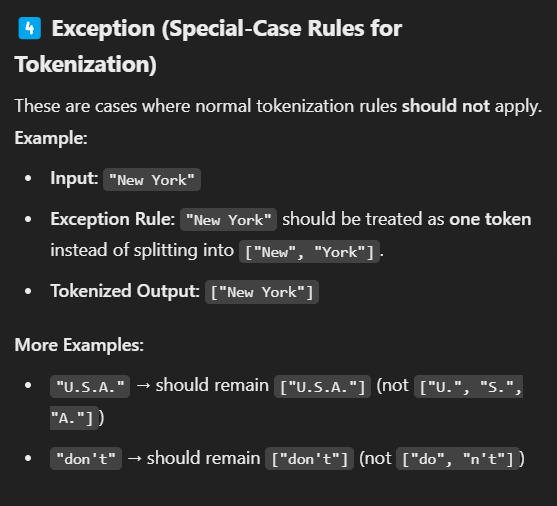

In [14]:
mystring = '"We\'re moving to L.A.!"'
print(mystring)

"We're moving to L.A.!"


In [24]:
# Create a Doc object and explore tokens
doc10 = nlp(mystring)

for token in doc10:
    print(token.text, end=' | ')

" | We | 're | moving | to | L.A. | ! | " | 

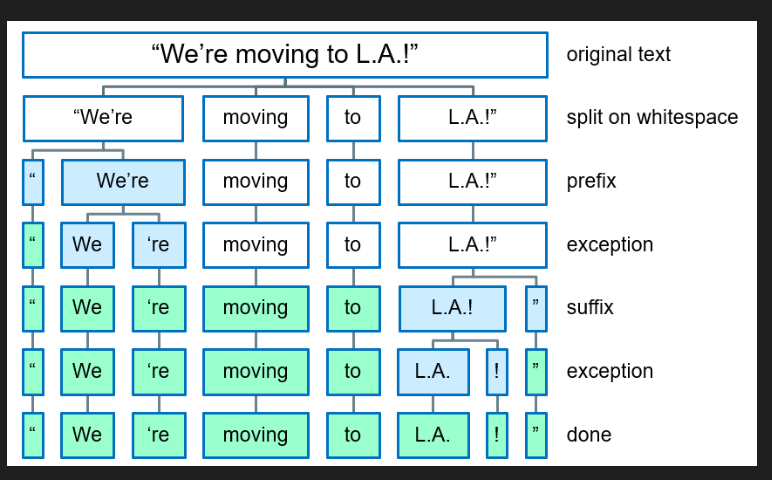

In [16]:
doc2 = nlp("We're here to help! send snail-mail, email support@oursite.com or visit us at http://www.oursite.com! ")

In [19]:
for t in doc2:
  print(t.text)

We
're
here
to
help
!
send
snail
-
mail
,
email
support@oursite.com
or
visit
us
at
http://www.oursite.com
!


In [18]:
# '''Note that the exclamation points, comma, and the hyphen in 'snail-mail'
# are assigned their own tokens, yet both the email address and website are preserved.'''

In [20]:
doc3 = nlp(u'A 5km NYC cab ride costs $10.30')

for t in doc3:
    print(t)

A
5
km
NYC
cab
ride
costs
$
10.30


In [ ]:
# Here the distance unit and dollar sign are assigned their own tokens, yet the dollar amount is preserved.

Exceptions:

Punctuation that exists as part of a known abbreviation will be kept as part of the token.

In [21]:
doc4 = nlp(u"Let's visit St. Louis in the U.S. next year.")

for t in doc4:
    print(t)

Let
's
visit
St.
Louis
in
the
U.S.
next
year
.


**Counting Tokens**

`Doc` objects have a set number of tokens:

In [25]:
len(doc10)

8

**Counting Vocab Entries**:

`Vocab` objects contain a full library of items!

- In NLP tokenization, "Counting Vocabulary Entries" refers to the process of determining the number of unique words (tokens) in a given text after tokenization.

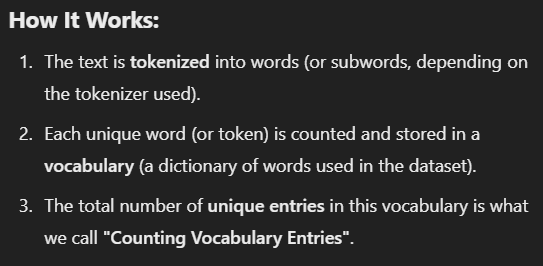

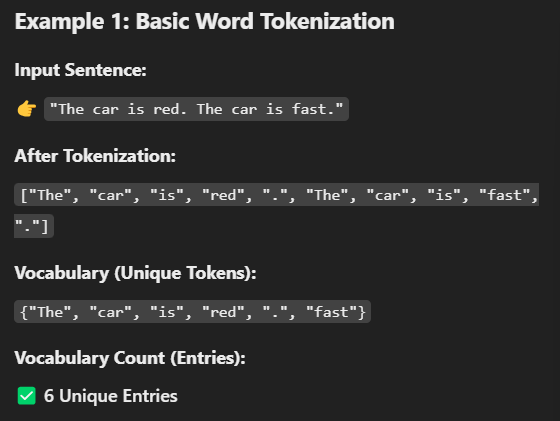

In [29]:
len(doc10.vocab)

825

In [30]:
text = "The car is red. The car is fast."

In [31]:
doc11 = nlp(text)

In [32]:
token = [t.text for t in doc11]

In [33]:
vocab = set(token)

In [34]:
print("Unique Vocabulary:", vocab)
print("Total Unique Entries:", len(vocab))

Unique Vocabulary: {'.', 'is', 'red', 'car', 'fast', 'The'}
Total Unique Entries: 6


Tokens can be retrieved by index position and slice:

`Doc` objects can be thought of as lists of `token` objects. As such, individual tokens can be retrieved by index position, and spans of tokens can be retrieved through slicing:

In [35]:
doc11[0]

The

In [36]:
doc11[2:6]

is red. The

In [37]:
doc11[-4:]

car is fast.

In [38]:
doc11[0] = 'test'

TypeError: 'spacy.tokens.doc.Doc' object does not support item assignment

📌 Named Entities in NLP

- Named Entities are specific real-world objects (like names of people, organizations, locations, dates, etc.) that are identified in a given text.
- Named Entity Recognition (NER) is the NLP technique used to detect and classify these entities.

- Named entities are accessible through the `ents` property of a `Doc` object.

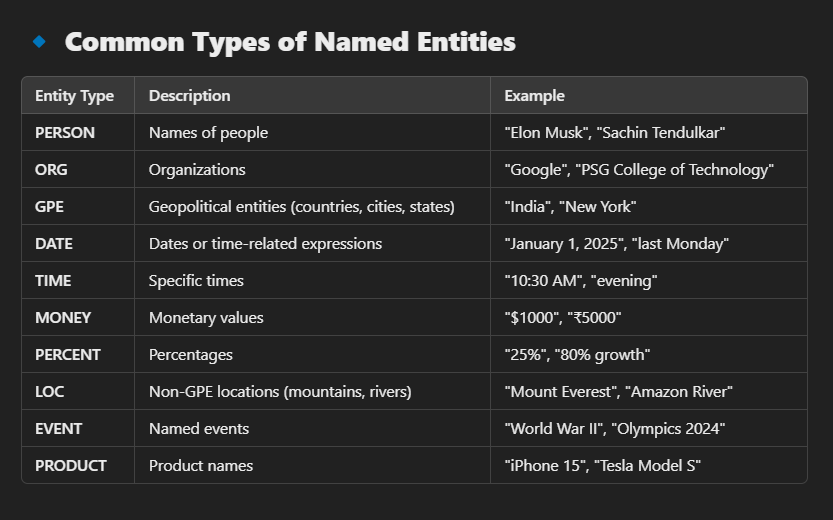

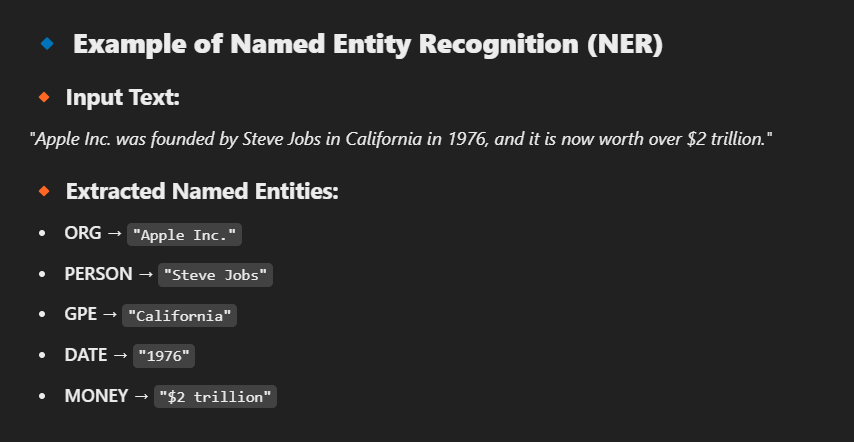

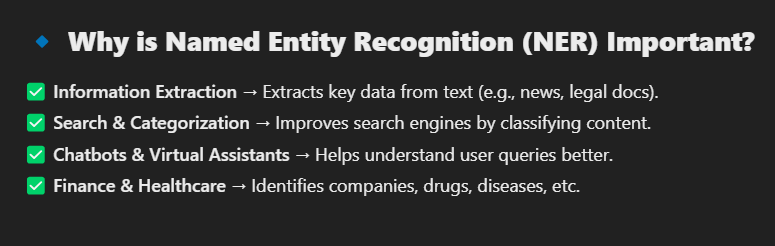

In [39]:
text = "Apple Inc. was founded by Steve Jobs in California in 1976, and it is now worth over $2 trillion."

# Process text
doc = nlp(text)

# Print Named Entities
for ent in doc.ents:
    print(f"Entity: {ent.text}, Type: {ent.label_}")

Entity: Apple Inc., Type: ORG
Entity: Steve Jobs, Type: PERSON
Entity: California, Type: GPE
Entity: 1976, Type: DATE
Entity: over $2 trillion, Type: MONEY


In [40]:
doc8 = nlp(u'Apple to build a Hong Kong factory for $6 million')

for token in doc8:
    print(token.text, end=' | ')

print('\n----')

for ent in doc8.ents:
    print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))

Apple | to | build | a | Hong | Kong | factory | for | $ | 6 | million | 
----
Apple - ORG - Companies, agencies, institutions, etc.
Hong Kong - GPE - Countries, cities, states
$6 million - MONEY - Monetary values, including unit


In [41]:
len(doc8.ents)

3

📌 Noun Chunks in NLP:

- Noun Chunks are phrases centered around a noun that provide meaningful information about the noun.

- These chunks typically include determiners, adjectives, and prepositional phrases along with the noun.

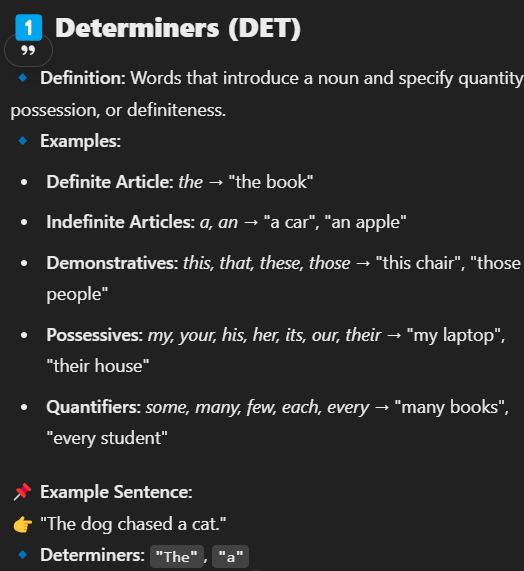

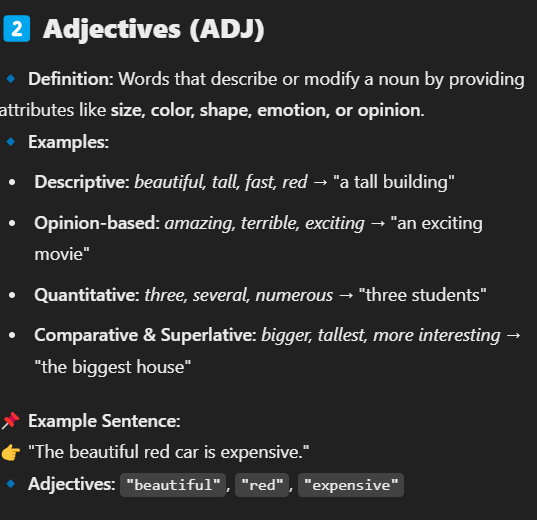

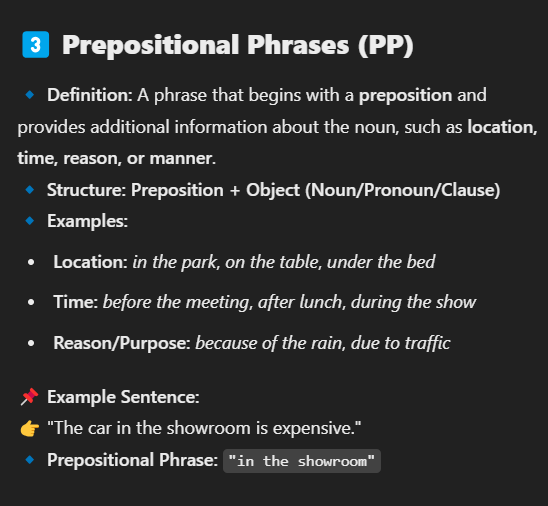

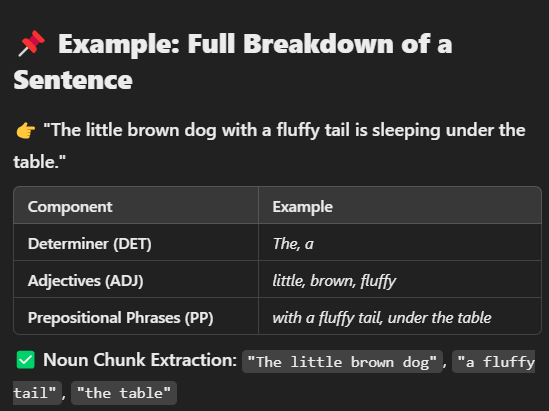

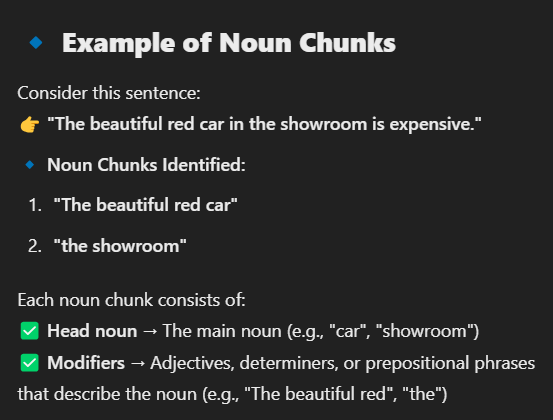

In [42]:
text = "The beautiful red car in the showroom is expensive."

# Process the text
doc = nlp(text)

# Extract and print noun chunks
print("Noun Chunks:")
for chunk in doc.noun_chunks:
    print(f"- {chunk.text}")

Noun Chunks:
- The beautiful red car
- the showroom


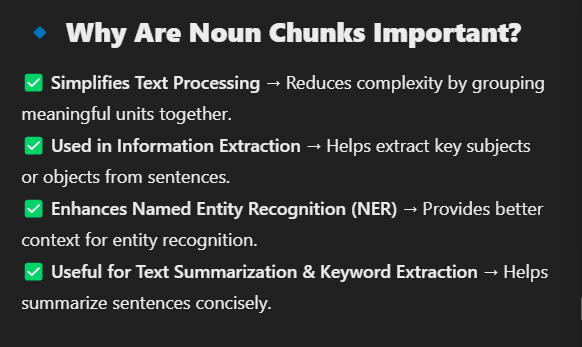

In [43]:
doc9 = nlp(u"Autonomous cars shift insurance liability toward manufacturers.")

for chunk in doc9.noun_chunks:
    print(chunk.text)

Autonomous cars
insurance liability
manufacturers


In [44]:
doc10 = nlp(u"Red cars do not carry higher insurance rates.")

for chunk in doc10.noun_chunks:
    print(chunk.text)

Red cars
higher insurance rates


In [45]:
doc11 = nlp(u"He was a one-eyed, one-horned, flying, purple people-eater.")

for chunk in doc11.noun_chunks:
    print(chunk.text)

He
a one-eyed, one-horned, flying, purple people-eater



📌 Token Visualization in NLP:

- Token visualization is a way to graphically represent tokens, their relationships, dependencies, parts of speech (POS), named entities, and syntactic structures in a text.

- This helps in understanding how NLP models analyze sentences.

- spaCy provides a visualization tool called displacy that helps visualize:

       - Dependency Parsing (word relationships)
      - Named Entity Recognition (NER)



In [47]:
from spacy import displacy

In [48]:
doc14 = nlp(u'Apple is going to build a U.K. factory for $6 million.')

In [52]:
displacy.render(doc14,style ='dep',jupyter=True,options = {'distance':110})

In [54]:
doc16 = nlp(u'Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million.')
displacy.render(doc16, style='ent', jupyter=True)

In [55]:
doc17 = nlp(u'This is a sentence.')
displacy.serve(doc17, style='dep')

/usr/local/lib/python3.11/dist-packages/spacy/displacy/__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.
